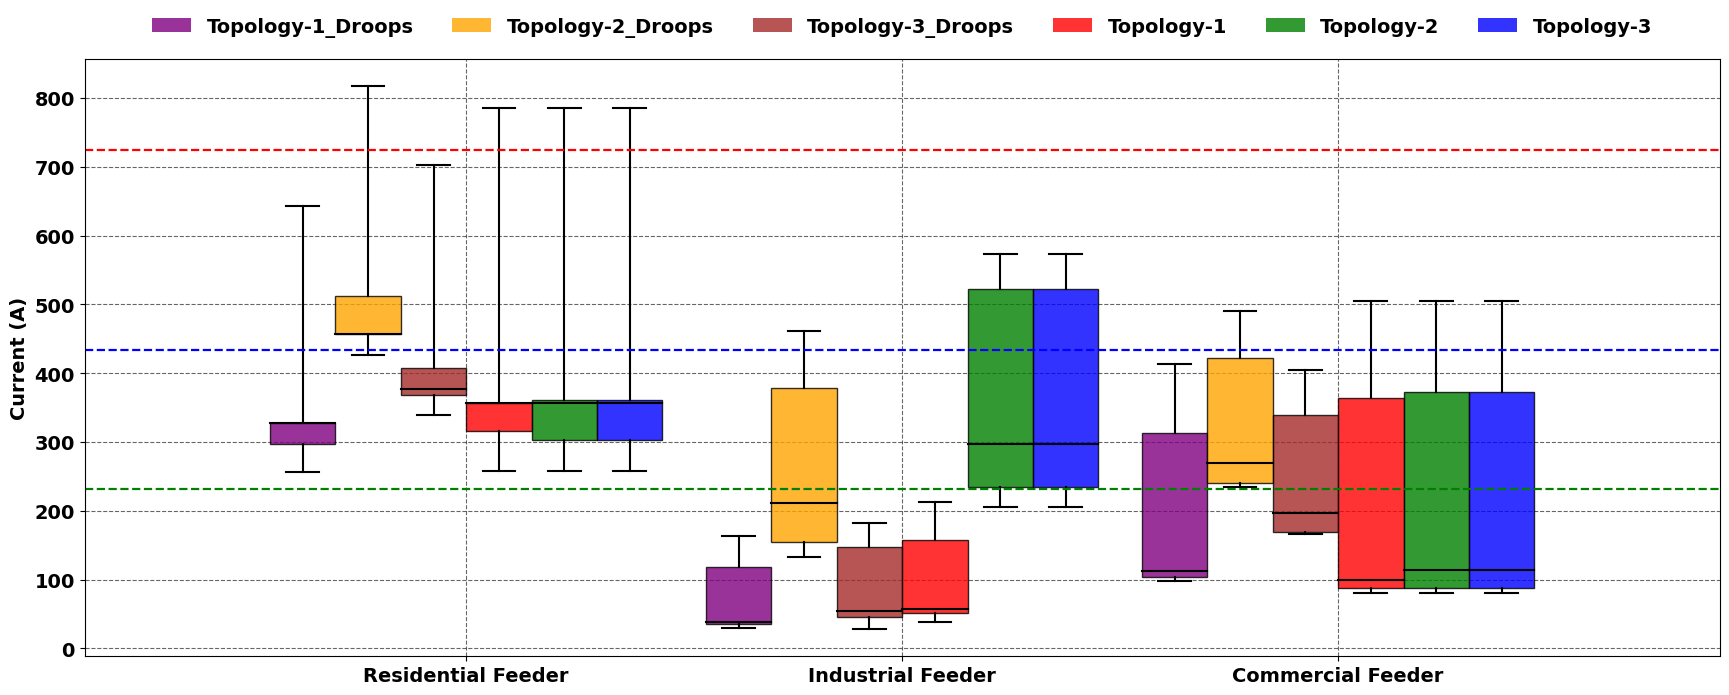

In [ ]:
## OK -- Current at phase 0 case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
selected_feeders = ['R01', 'I01', 'C01']  # Feeders to include
selected_phase = 0  # Phase to filter by

# Feeder name mapping
feeder_names = {
    'R01': 'Residential Feeder',
    'I01': 'Industrial Feeder',
    'C01': 'Commercial Feeder'
}

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'current_With_Droop_T1_case3.csv', 'current_With_Droop_T2_case3.csv', 'current_With_Droop_T3_case3.csv',
    'current_Without_Droop_T1_case3.csv', 'current_Without_Droop_T2_case3.csv', 'current_Without_Droop_T3_case3.csv'
]

# Function to read and process current data
def process_current_data(file_path, selected_feeders, selected_phase):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Current (A)'])
        df['Current (A)'] = pd.to_numeric(df['Current (A)'], errors='coerce')
        df = df.dropna(subset=['Current (A)'])

        filtered_data = {feeder: [] for feeder in selected_feeders}
        for feeder in selected_feeders:
            feeder_data = df[(df['Bus'] == feeder) & (df['Phase'] == selected_phase)]['Current (A)'].values
            if len(feeder_data) > 0:
                filtered_data[feeder] = feeder_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None


# Read and process all CSV files
all_current_data = {}
for file_name in file_names:
    data = process_current_data(file_name, selected_feeders, selected_phase)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('current_', '')
        all_current_data[scenario_name] = data

# Prepare data for box plot
box_plot_data = {}
for scenario, data in all_current_data.items():
    for feeder, currents in data.items():
        if feeder not in box_plot_data:
            box_plot_data[feeder] = {}
        box_plot_data[feeder][scenario] = currents

scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(18, 7)) #Reduced figure size for better readability

handles = []
labels = []
width = 0.15

positions = np.arange(len(selected_feeders))

for i, feeder in enumerate(selected_feeders):
    bus_positions = positions[i] + np.arange(len(box_plot_data[feeder])) * width
    for j, (scenario, currents) in enumerate(box_plot_data[feeder].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)
        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'
        box = ax.boxplot(currents, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)
        if mapped_scenario not in labels:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
            handles.append(handle)
            labels.append(mapped_scenario)

ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.set_xticks(positions + width * (len(box_plot_data[selected_feeders[0]]) - 1) / 2)
ax.set_xticklabels([feeder_names[feeder] for feeder in selected_feeders], fontweight='bold', fontsize=14) 
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels), frameon=False, prop={'size': 14, 'weight': 'bold'})
ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
### New Figures ###

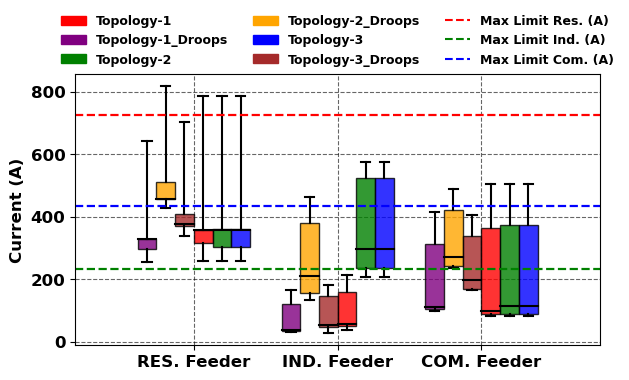

In [24]:
### currents of each feeder at phase-0 --- case-3 --- ########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Define parameters
selected_feeders = ['R01', 'I01', 'C01']  # Feeders to include
selected_phase = 0  # Phase to filter by (0 is A, 1 is B and 2 is C) three-phases

# Feeder name mapping
feeder_names = {
    'R01': 'RES. Feeder',
    'I01': 'IND. Feeder',
    'C01': 'COM. Feeder'
}

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'current_With_Droop_T1_case3.csv', 'current_With_Droop_T2_case3.csv', 'current_With_Droop_T3_case3.csv',
    'current_Without_Droop_T1_case3.csv', 'current_Without_Droop_T2_case3.csv', 'current_Without_Droop_T3_case3.csv'
]

# Function to read and process current data
def process_current_data(file_path, selected_feeders, selected_phase):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Current (A)'])
        df['Current (A)'] = pd.to_numeric(df['Current (A)'], errors='coerce')
        df = df.dropna(subset=['Current (A)'])

        filtered_data = {feeder: [] for feeder in selected_feeders}
        for feeder in selected_feeders:
            feeder_data = df[(df['Bus'] == feeder) & (df['Phase'] == selected_phase)]['Current (A)'].values
            if len(feeder_data) > 0:
                filtered_data[feeder] = feeder_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None


# Read and process all CSV files
all_current_data = {}
for file_name in file_names:
    data = process_current_data(file_name, selected_feeders, selected_phase)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('current_', '')
        all_current_data[scenario_name] = data

# Prepare data for box plot
box_plot_data = {}
for scenario, data in all_current_data.items():
    for feeder, currents in data.items():
        if feeder not in box_plot_data:
            box_plot_data[feeder] = {}
        box_plot_data[feeder][scenario] = currents

scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4))

handles = []
labels = []
width = 0.13

positions = np.arange(len(selected_feeders))

for i, feeder in enumerate(selected_feeders):
    bus_positions = positions[i] + np.arange(len(box_plot_data[feeder])) * width
    for j, (scenario, currents) in enumerate(box_plot_data[feeder].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)
        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        box = ax.boxplot(currents, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend and max current lines dynamically
max_currents = {
    'R01': 724,
    'I01': 231,
    'C01': 434
}
colors_lines = {
    'R01': 'red',
    'I01': 'green',
    'C01': 'blue'
}
labels_lines = {
    'R01': 'Max Limit Res. (A)',
    'I01': 'Max Limit Ind. (A)',
    'C01': 'Max Limit Com. (A)'
}

legend_handles_topologies = []
legend_labels_topologies = []
for scenario in sorted(topology_colors.keys()):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles_topologies.append(handle)
    legend_labels_topologies.append(scenario)

legend_handles_lines = []
legend_labels_lines = []
for feeder, max_current in max_currents.items():
    color = colors_lines[feeder]
    label = labels_lines[feeder]
    line = mlines.Line2D([0], [0], color=color, linestyle='--', label=label)
    ax.axhline(y=max_current, color=color, linestyle='--', linewidth=1.6) #Draw the lines on the plot which is the Max limit currents
    legend_handles_lines.append(line)
    legend_labels_lines.append(label)


# Combine legends
legend_handles = legend_handles_topologies + legend_handles_lines
legend_labels = legend_labels_topologies + legend_labels_lines

# Create the combined legend
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.26), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})

ax.set_xticks(positions + width * (len(box_plot_data[selected_feeders[0]]) - 1) / 2)
ax.set_xticklabels([feeder_names[feeder] for feeder in selected_feeders], fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)
ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

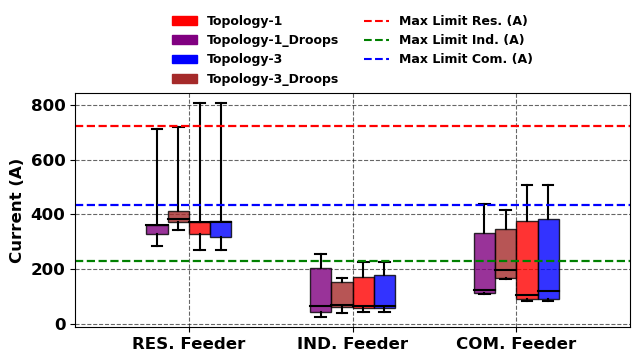

In [22]:
### currents of each feeder at phase-0 --- case-1 --- ########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Define parameters
selected_feeders = ['R01', 'I01', 'C01']  # Feeders to include
selected_phase = 0  # Phase to filter by (0 is A, 1 is B and 2 is C) three-phases

# Feeder name mapping
feeder_names = {
    'R01': 'RES. Feeder',
    'I01': 'IND. Feeder',
    'C01': 'COM. Feeder'
}

topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'current_With_Droop_T1_case1.csv', 'current_With_Droop_T3_case1.csv',
    'current_Without_Droop_T1_case1.csv', 'current_Without_Droop_T3_case1.csv'
]

# Function to read and process current data
def process_current_data(file_path, selected_feeders, selected_phase):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Current (A)'])
        df['Current (A)'] = pd.to_numeric(df['Current (A)'], errors='coerce')
        df = df.dropna(subset=['Current (A)'])

        filtered_data = {feeder: [] for feeder in selected_feeders}
        for feeder in selected_feeders:
            feeder_data = df[(df['Bus'] == feeder) & (df['Phase'] == selected_phase)]['Current (A)'].values
            if len(feeder_data) > 0:
                filtered_data[feeder] = feeder_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None


# Read and process all CSV files
all_current_data = {}
for file_name in file_names:
    data = process_current_data(file_name, selected_feeders, selected_phase)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('current_', '')
        all_current_data[scenario_name] = data

# Prepare data for box plot
box_plot_data = {}
for scenario, data in all_current_data.items():
    for feeder, currents in data.items():
        if feeder not in box_plot_data:
            box_plot_data[feeder] = {}
        box_plot_data[feeder][scenario] = currents

scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4))

handles = []
labels = []
width = 0.13

positions = np.arange(len(selected_feeders))

for i, feeder in enumerate(selected_feeders):
    bus_positions = positions[i] + np.arange(len(box_plot_data[feeder])) * width
    for j, (scenario, currents) in enumerate(box_plot_data[feeder].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)
        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'
        box = ax.boxplot(currents, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend with lines
legend_handles = []
legend_labels = []

# Manually add legend items for topologies
for scenario in ['Topology-1', 'Topology-1_Droops', 'Topology-3', 'Topology-3_Droops']:
    color = topology_colors[scenario]
    handle = mpatches.Patch(color=color, label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Manually add legend items for max current lines
max_currents = {
    'R01': 724,
    'I01': 231,
    'C01': 434
}
colors_lines = {
    'R01': 'red',
    'I01': 'green',
    'C01': 'blue'
}
labels_lines = {
    'R01': 'Max Limit Res. (A)',
    'I01': 'Max Limit Ind. (A)',
    'C01': 'Max Limit Com. (A)'
}

for feeder, max_current in max_currents.items():
    color = colors_lines[feeder]
    label = labels_lines[feeder]
    line = mlines.Line2D([0], [0], color=color, linestyle='--', label=label)
    legend_handles.append(line)
    legend_labels.append(label)
    ax.axhline(y=max_current, color=color, linestyle='--', linewidth=1.6)


# Create the legend
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.38), ncols=2, frameon=False, prop={'size': 9, 'weight': 'bold'})

ax.set_xticks(positions + width * (len(box_plot_data[selected_feeders[0]]) - 1) / 2)
ax.set_xticklabels([feeder_names[feeder] for feeder in selected_feeders], fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)
ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
### END ###

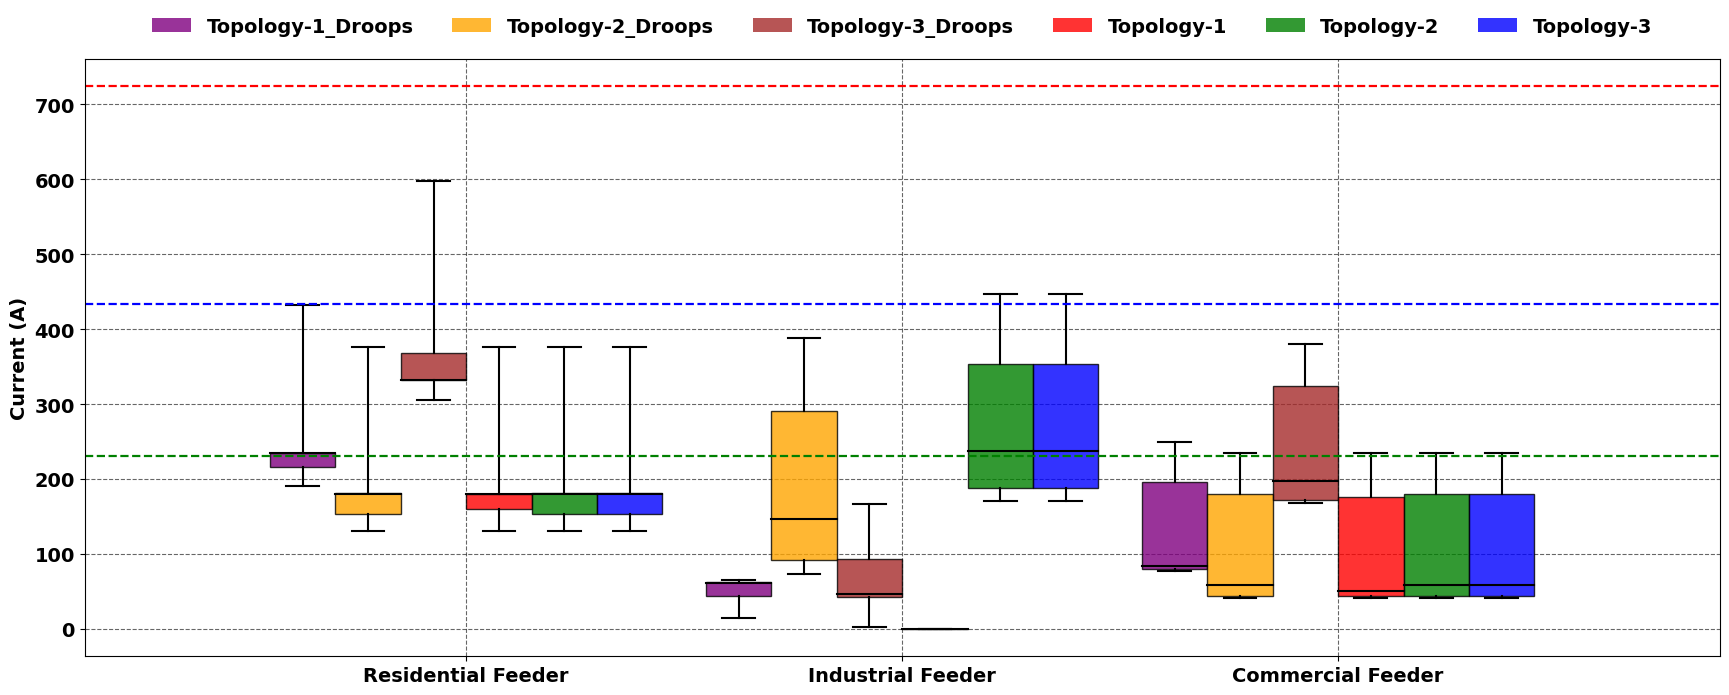

In [ ]:
## OK -- Current at phase 1 case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
selected_feeders = ['R01', 'I01', 'C01']  # Feeders to include
selected_phase = 1  # Phase to filter by

# Feeder name mapping
feeder_names = {
    'R01': 'Residential Feeder',
    'I01': 'Industrial Feeder',
    'C01': 'Commercial Feeder'
}

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'current_With_Droop_T1_case3.csv', 'current_With_Droop_T2_case3.csv', 'current_With_Droop_T3_case3.csv',
    'current_Without_Droop_T1_case3.csv', 'current_Without_Droop_T2_case3.csv', 'current_Without_Droop_T3_case3.csv'
]

# Function to read and process current data
def process_current_data(file_path, selected_feeders, selected_phase):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Current (A)'])
        df['Current (A)'] = pd.to_numeric(df['Current (A)'], errors='coerce')
        df = df.dropna(subset=['Current (A)'])

        filtered_data = {feeder: [] for feeder in selected_feeders}
        for feeder in selected_feeders:
            feeder_data = df[(df['Bus'] == feeder) & (df['Phase'] == selected_phase)]['Current (A)'].values
            if len(feeder_data) > 0:
                filtered_data[feeder] = feeder_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None


# Read and process all CSV files
all_current_data = {}
for file_name in file_names:
    data = process_current_data(file_name, selected_feeders, selected_phase)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('current_', '')
        all_current_data[scenario_name] = data

# Prepare data for box plot
box_plot_data = {}
for scenario, data in all_current_data.items():
    for feeder, currents in data.items():
        if feeder not in box_plot_data:
            box_plot_data[feeder] = {}
        box_plot_data[feeder][scenario] = currents

scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(18, 7)) #Reduced figure size for better readability

handles = []
labels = []
width = 0.15

positions = np.arange(len(selected_feeders))

for i, feeder in enumerate(selected_feeders):
    bus_positions = positions[i] + np.arange(len(box_plot_data[feeder])) * width
    for j, (scenario, currents) in enumerate(box_plot_data[feeder].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)
        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'
        box = ax.boxplot(currents, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)
        if mapped_scenario not in labels:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
            handles.append(handle)
            labels.append(mapped_scenario)

ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.set_xticks(positions + width * (len(box_plot_data[selected_feeders[0]]) - 1) / 2)
ax.set_xticklabels([feeder_names[feeder] for feeder in selected_feeders], fontweight='bold', fontsize=14) 
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels), frameon=False, prop={'size': 14, 'weight': 'bold'})
ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

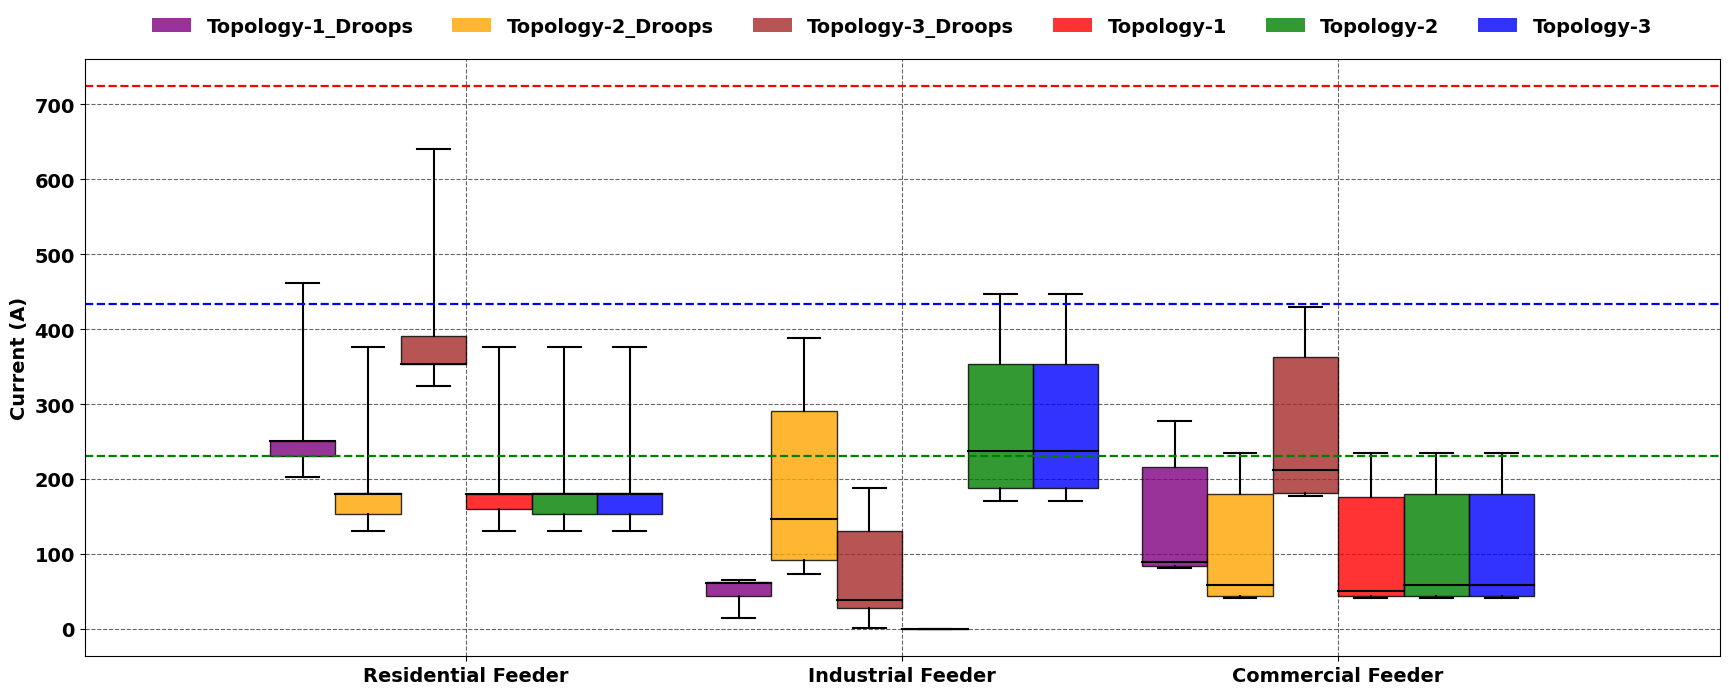

In [ ]:
## OK -- Current at phase 2 case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
selected_feeders = ['R01', 'I01', 'C01']  # Feeders to include
selected_phase = 2  # Phase to filter by

# Feeder name mapping
feeder_names = {
    'R01': 'Residential Feeder',
    'I01': 'Industrial Feeder',
    'C01': 'Commercial Feeder'
}

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'current_With_Droop_T1_case3.csv', 'current_With_Droop_T2_case3.csv', 'current_With_Droop_T3_case3.csv',
    'current_Without_Droop_T1_case3.csv', 'current_Without_Droop_T2_case3.csv', 'current_Without_Droop_T3_case3.csv'
]

# Function to read and process current data
def process_current_data(file_path, selected_feeders, selected_phase):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Current (A)'])
        df['Current (A)'] = pd.to_numeric(df['Current (A)'], errors='coerce')
        df = df.dropna(subset=['Current (A)'])

        filtered_data = {feeder: [] for feeder in selected_feeders}
        for feeder in selected_feeders:
            feeder_data = df[(df['Bus'] == feeder) & (df['Phase'] == selected_phase)]['Current (A)'].values
            if len(feeder_data) > 0:
                filtered_data[feeder] = feeder_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None


# Read and process all CSV files
all_current_data = {}
for file_name in file_names:
    data = process_current_data(file_name, selected_feeders, selected_phase)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('current_', '')
        all_current_data[scenario_name] = data

# Prepare data for box plot
box_plot_data = {}
for scenario, data in all_current_data.items():
    for feeder, currents in data.items():
        if feeder not in box_plot_data:
            box_plot_data[feeder] = {}
        box_plot_data[feeder][scenario] = currents

scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(18, 7)) #Reduced figure size for better readability

handles = []
labels = []
width = 0.15

positions = np.arange(len(selected_feeders))

for i, feeder in enumerate(selected_feeders):
    bus_positions = positions[i] + np.arange(len(box_plot_data[feeder])) * width
    for j, (scenario, currents) in enumerate(box_plot_data[feeder].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)
        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'
        box = ax.boxplot(currents, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)
        if mapped_scenario not in labels:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
            handles.append(handle)
            labels.append(mapped_scenario)

ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.set_xticks(positions + width * (len(box_plot_data[selected_feeders[0]]) - 1) / 2)
ax.set_xticklabels([feeder_names[feeder] for feeder in selected_feeders], fontweight='bold', fontsize=14) 
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels), frameon=False, prop={'size': 14, 'weight': 'bold'})
ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

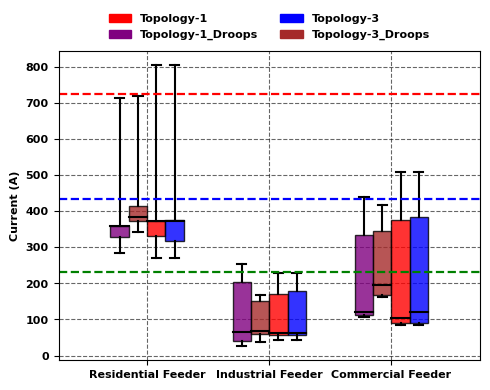

In [10]:
## OK -- Current at phase 0 case-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Define parameters
selected_feeders = ['R01', 'I01', 'C01']  # Feeders to include
selected_phase = 0  # Phase to filter by

# Feeder name mapping
feeder_names = {
    'R01': 'Residential Feeder',
    'I01': 'Industrial Feeder',
    'C01': 'Commercial Feeder'
}

topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'current_With_Droop_T1_case1.csv', 'current_With_Droop_T3_case1.csv',
    'current_Without_Droop_T1_case1.csv', 'current_Without_Droop_T3_case1.csv'
]

# Function to read and process current data
def process_current_data(file_path, selected_feeders, selected_phase):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Current (A)'])
        df['Current (A)'] = pd.to_numeric(df['Current (A)'], errors='coerce')
        df = df.dropna(subset=['Current (A)'])

        filtered_data = {feeder: [] for feeder in selected_feeders}
        for feeder in selected_feeders:
            feeder_data = df[(df['Bus'] == feeder) & (df['Phase'] == selected_phase)]['Current (A)'].values
            if len(feeder_data) > 0:
                filtered_data[feeder] = feeder_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None


# Read and process all CSV files
all_current_data = {}
for file_name in file_names:
    data = process_current_data(file_name, selected_feeders, selected_phase)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('current_', '')
        all_current_data[scenario_name] = data

# Prepare data for box plot
box_plot_data = {}
for scenario, data in all_current_data.items():
    for feeder, currents in data.items():
        if feeder not in box_plot_data:
            box_plot_data[feeder] = {}
        box_plot_data[feeder][scenario] = currents

scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(5, 4))

handles = []
labels = []
width = 0.15

positions = np.arange(len(selected_feeders))

for i, feeder in enumerate(selected_feeders):
    bus_positions = positions[i] + np.arange(len(box_plot_data[feeder])) * width
    for j, (scenario, currents) in enumerate(box_plot_data[feeder].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)
        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'
        box = ax.boxplot(currents, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend with 2x2 layout
legend_handles = []
legend_labels = []

# Manually add legend items, controlling their order for the 2x2 grid
for scenario in ['Topology-1', 'Topology-1_Droops', 'Topology-3', 'Topology-3_Droops']:
    color = topology_colors[scenario]
    handle = mpatches.Patch(color=color, label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=2, frameon=False, prop={'size': 8, 'weight': 'bold'})

ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.set_xticks(positions + width * (len(box_plot_data[selected_feeders[0]]) - 1) / 2)
ax.set_xticklabels([feeder_names[feeder] for feeder in selected_feeders], fontweight='bold', fontsize=8) 
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=8)
ax.tick_params(axis='y', labelsize=8)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

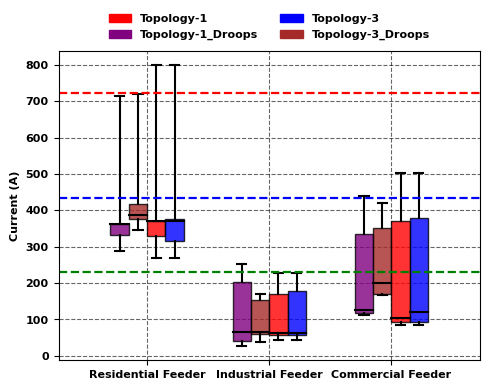

In [11]:
## OK -- Current at phase 1 case-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Define parameters
selected_feeders = ['R01', 'I01', 'C01']  # Feeders to include
selected_phase = 1  # Phase to filter by

# Feeder name mapping
feeder_names = {
    'R01': 'Residential Feeder',
    'I01': 'Industrial Feeder',
    'C01': 'Commercial Feeder'
}

topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'current_With_Droop_T1_case1.csv', 'current_With_Droop_T3_case1.csv',
    'current_Without_Droop_T1_case1.csv', 'current_Without_Droop_T3_case1.csv'
]

# Function to read and process current data
def process_current_data(file_path, selected_feeders, selected_phase):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Current (A)'])
        df['Current (A)'] = pd.to_numeric(df['Current (A)'], errors='coerce')
        df = df.dropna(subset=['Current (A)'])

        filtered_data = {feeder: [] for feeder in selected_feeders}
        for feeder in selected_feeders:
            feeder_data = df[(df['Bus'] == feeder) & (df['Phase'] == selected_phase)]['Current (A)'].values
            if len(feeder_data) > 0:
                filtered_data[feeder] = feeder_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None


# Read and process all CSV files
all_current_data = {}
for file_name in file_names:
    data = process_current_data(file_name, selected_feeders, selected_phase)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('current_', '')
        all_current_data[scenario_name] = data

# Prepare data for box plot
box_plot_data = {}
for scenario, data in all_current_data.items():
    for feeder, currents in data.items():
        if feeder not in box_plot_data:
            box_plot_data[feeder] = {}
        box_plot_data[feeder][scenario] = currents

scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(5, 4))

handles = []
labels = []
width = 0.15

positions = np.arange(len(selected_feeders))

for i, feeder in enumerate(selected_feeders):
    bus_positions = positions[i] + np.arange(len(box_plot_data[feeder])) * width
    for j, (scenario, currents) in enumerate(box_plot_data[feeder].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)
        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'
        box = ax.boxplot(currents, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend with 2x2 layout
legend_handles = []
legend_labels = []

# Manually add legend items, controlling their order for the 2x2 grid
for scenario in ['Topology-1', 'Topology-1_Droops', 'Topology-3', 'Topology-3_Droops']:
    color = topology_colors[scenario]
    handle = mpatches.Patch(color=color, label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=2, frameon=False, prop={'size': 8, 'weight': 'bold'})

ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.set_xticks(positions + width * (len(box_plot_data[selected_feeders[0]]) - 1) / 2)
ax.set_xticklabels([feeder_names[feeder] for feeder in selected_feeders], fontweight='bold', fontsize=8) 
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=8)
ax.tick_params(axis='y', labelsize=8)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

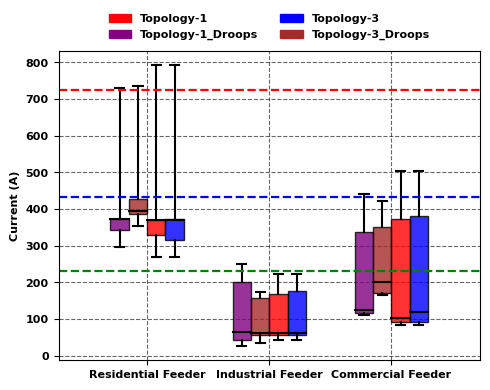

In [12]:
## OK -- Current at phase 2 case-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Define parameters
selected_feeders = ['R01', 'I01', 'C01']  # Feeders to include
selected_phase = 2  # Phase to filter by

# Feeder name mapping
feeder_names = {
    'R01': 'Residential Feeder',
    'I01': 'Industrial Feeder',
    'C01': 'Commercial Feeder'
}

topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'current_With_Droop_T1_case1.csv', 'current_With_Droop_T3_case1.csv',
    'current_Without_Droop_T1_case1.csv', 'current_Without_Droop_T3_case1.csv'
]

# Function to read and process current data
def process_current_data(file_path, selected_feeders, selected_phase):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Bus', 'Current (A)'])
        df['Current (A)'] = pd.to_numeric(df['Current (A)'], errors='coerce')
        df = df.dropna(subset=['Current (A)'])

        filtered_data = {feeder: [] for feeder in selected_feeders}
        for feeder in selected_feeders:
            feeder_data = df[(df['Bus'] == feeder) & (df['Phase'] == selected_phase)]['Current (A)'].values
            if len(feeder_data) > 0:
                filtered_data[feeder] = feeder_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None


# Read and process all CSV files
all_current_data = {}
for file_name in file_names:
    data = process_current_data(file_name, selected_feeders, selected_phase)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('current_', '')
        all_current_data[scenario_name] = data

# Prepare data for box plot
box_plot_data = {}
for scenario, data in all_current_data.items():
    for feeder, currents in data.items():
        if feeder not in box_plot_data:
            box_plot_data[feeder] = {}
        box_plot_data[feeder][scenario] = currents

scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(5, 4))

handles = []
labels = []
width = 0.15

positions = np.arange(len(selected_feeders))

for i, feeder in enumerate(selected_feeders):
    bus_positions = positions[i] + np.arange(len(box_plot_data[feeder])) * width
    for j, (scenario, currents) in enumerate(box_plot_data[feeder].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)
        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'
        box = ax.boxplot(currents, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend with 2x2 layout
legend_handles = []
legend_labels = []

# Manually add legend items, controlling their order for the 2x2 grid
for scenario in ['Topology-1', 'Topology-1_Droops', 'Topology-3', 'Topology-3_Droops']:
    color = topology_colors[scenario]
    handle = mpatches.Patch(color=color, label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=2, frameon=False, prop={'size': 8, 'weight': 'bold'})

ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.set_xticks(positions + width * (len(box_plot_data[selected_feeders[0]]) - 1) / 2)
ax.set_xticklabels([feeder_names[feeder] for feeder in selected_feeders], fontweight='bold', fontsize=8) 
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=8)
ax.tick_params(axis='y', labelsize=8)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
### End